In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
216554,British Virgin Islands,Cook Islands
216555,British Virgin Islands,Cook Islands
216556,British Virgin Islands,Cook Islands
216557,British Virgin Islands,Cook Islands


In [5]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1212,Vietnam,Panama,1
1213,Yemen,Panama,1
1214,Zambia,British Virgin Islands,2
1215,Zimbabwe,British Virgin Islands,5


### Convert Data to an Undirected Edge List

In [6]:
#df_jur_grouped_list = df_jur_grouped.values.tolist()
#df_jur_grouped_list

In [7]:
#d = collections.defaultdict(int)
#for n1, n2, v in df_jur_grouped_list:
#    d[min(n1, n2), max(n1, n2)] += v
#result = [[k[0], k[1], v] for k, v in d.items()]

In [8]:
#df_net = pd.DataFrame(result)
#df_net

In [9]:
#df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
#df_net

In [10]:
#import df_net to csv later

In [11]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


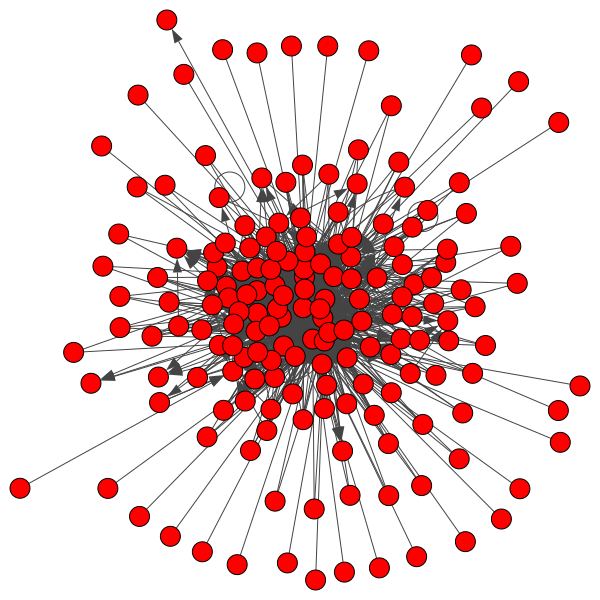

In [12]:
ig.plot(g)

In [13]:
g.diameter()

5

In [14]:
len(g.vs.indices)

174

In [15]:
#g.vs.indices
df_jur_grouped['node_start'].value_counts()

Cayman Islands              32
United States               23
Switzerland                 23
United Kingdom              22
Jersey                      21
                            ..
Slovakia                     1
Central African Republic     1
Kyrgyzstan                   1
Georgia                      1
Mongolia                     1
Name: node_start, Length: 168, dtype: int64

In [16]:
uni =df_jur_grouped['node_start'].unique()

In [17]:
len(uni)

168

In [18]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 2, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 4, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 5, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 6, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 7, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 8, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 9, {'name': 'Panama'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 10, {'name': 'Samoa'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc66eb35d60>, 11, {'name': 'Seychelles'}),
 ig

In [19]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [20]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [21]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,58.751445,0.01,5.0,-0.452653,7.028902,0.040629,2.248649
1,2,58.691860,0.01,5.0,-0.453114,7.023256,0.040833,2.247683
2,3,57.912281,0.02,5.0,-0.451223,7.005848,0.040970,2.249590
3,4,57.941176,0.02,5.0,-0.450670,7.023529,0.041315,2.250476
4,5,57.863905,0.03,5.0,-0.450467,7.035503,0.041630,2.249074


In [22]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
169,170,0.0,0.87,0.0,NaN,0.0,0.0,NaN
170,171,0.0,0.87,0.0,NaN,0.0,0.0,NaN
171,172,0.0,0.88,0.0,NaN,0.0,0.0,NaN
172,173,0.0,0.88,0.0,NaN,0.0,0.0,NaN
173,174,0.0,0.89,NaN,NaN,0.0,NaN,NaN


In [23]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,32.0,104.235290,-0.455171,1239.514451,0.040128,0.005780,0.009436,2.250815
1,2,0.01,32.0,104.432879,-0.456073,1246.354651,0.040224,0.005814,0.009491,2.251956
2,3,0.02,32.0,104.570401,-0.458828,1250.777778,0.040286,0.005848,0.009546,2.254125
3,4,0.02,32.0,104.356894,-0.458779,1258.129412,0.040727,0.005882,0.009602,2.249936
4,5,0.03,32.0,104.422911,-0.459692,1264.207101,0.040965,0.005917,0.009659,2.251221


In [24]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
159,160,0.82,366.0,0.0,NaN,28.142857,0.020408,0.071429,0.071429,1.0
160,161,0.82,366.0,0.0,NaN,30.307692,0.023669,0.076923,0.076923,1.0
161,162,0.83,366.0,0.0,NaN,32.833333,0.027778,0.083333,0.083333,1.0
162,163,0.83,0.0,0.0,NaN,0.000000,0.000000,0.090909,1.000000,NaN
163,164,0.84,0.0,0.0,NaN,0.000000,0.000000,0.100000,1.000000,NaN
164,165,0.84,0.0,0.0,NaN,0.000000,0.000000,0.111111,1.000000,NaN
165,166,0.85,0.0,0.0,NaN,0.000000,0.000000,0.125000,1.000000,NaN
166,167,0.85,0.0,0.0,NaN,0.000000,0.000000,0.142857,1.000000,NaN
167,168,0.86,0.0,0.0,NaN,0.000000,0.000000,0.166667,1.000000,NaN
168,169,0.86,0.0,0.0,NaN,0.000000,0.000000,0.200000,1.000000,NaN


### Targeted attack

In [25]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [26]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [27]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,114858.0
9,9,Panama,42243.0
1,1,Bahamas,15532.0
11,11,Seychelles,14920.0
8,8,Niue,9456.0
10,10,Samoa,6237.0
22,22,British Anguilla,3240.0
17,17,Barbados,2361.0
15,15,Bermuda,2331.0
4,4,Cayman Islands,1434.0


In [28]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
53,53,Canada,0.0
52,52,Cameroon,0.0
51,51,Bulgaria,0.0
50,50,Brunei,0.0
48,48,Brazil,0.0
47,47,Botswana,0.0
46,46,Bolivia,0.0
36,36,Belgium,0.0
35,35,Belarus,0.0
34,34,Bangladesh,0.0


In [29]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [30]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Panama',
 'Bahamas',
 'Seychelles',
 'Niue',
 'Samoa',
 'British Anguilla',
 'Barbados',
 'Bermuda',
 'Cayman Islands',
 'Nevada',
 'Hong Kong',
 'Labuan',
 'Isle of Man',
 'Cook Islands',
 'State of Delaware',
 'Malta',
 'Saint Kitts and Nevis',
 'Belize',
 'United Kingdom',
 'Costa Rica',
 'Cyprus',
 'United States',
 'Liechtenstein',
 'Uruguay',
 'Wyoming',
 'Jersey',
 'Singapore',
 'New Zealand',
 'Guernsey',
 'Mauritius',
 'Saint Vincent and the Grenadines',
 'Netherlands',
 'Liberia',
 'Netherlands Antilles',
 'Saint Lucia',
 'Malaysia',
 'United Arab Emirates',
 'Turks and Caicos Islands',
 'Antigua and Barbuda',
 'Grenada',
 'US Virgin Islands',
 'Aruba',
 'Dubai',
 'Luxembourg',
 'Vanuatu',
 'Marshall Islands',
 'Thailand',
 'Gibraltar',
 'Montenegro',
 'Nigeria',
 'Libya',
 'Portugal',
 'Poland',
 'Philippines',
 'Peru',
 'Lithuania',
 'Paraguay',
 'Pakistan',
 'Oman',
 'Norway',
 'Macao',
 'Nicaragua',
 'Morocco',
 'Nauru',
 'Macedonia',
 'Malawi

In [31]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [32]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [33]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,54.722543,6.0,-0.432098,6.121387,0.035384,2.279497
1,2,0.01,Panama,50.424419,6.0,-0.410127,5.313953,0.030895,2.316684
2,3,0.02,Bahamas,53.461988,6.0,-0.412675,4.707602,0.027530,2.449041
3,4,0.02,Seychelles,47.041176,6.0,-0.407399,4.194118,0.024671,2.418914
4,5,0.03,Niue,46.798817,6.0,-0.416286,3.816568,0.022583,2.435911


In [34]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
169,170,0.87,Finland,0.0,0.0,NaN,0.0,0.0,NaN
170,171,0.87,Fiji,0.0,0.0,NaN,0.0,0.0,NaN
171,172,0.88,Estonia,0.0,0.0,NaN,0.0,0.0,NaN
172,173,0.88,El Salvador,0.0,0.0,NaN,0.0,0.0,NaN
173,174,0.89,Zimbabwe,0.0,NaN,NaN,0.0,NaN,NaN


In [35]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,British Virgin Islands,98.116731,33.0,-0.432098,579.705202,0.035384,0.005780,0.009980,2.279497
1,2,0.01,Panama,87.201172,140.0,-0.410127,309.081395,0.030895,0.005814,0.018322,2.316684
2,3,0.02,Bahamas,83.262049,141.0,-0.412675,223.660819,0.027530,0.005848,0.014434,2.449041
3,4,0.02,Seychelles,72.577372,141.0,-0.407399,145.241176,0.024671,0.005882,0.014217,2.418914
4,5,0.03,Niue,71.809548,141.0,-0.416286,99.905325,0.022583,0.005917,0.010303,2.435911
5,6,0.03,Samoa,69.471341,141.0,-0.427183,65.922619,0.020904,0.005952,0.012723,2.446347
6,7,0.04,British Anguilla,63.975661,141.0,-0.427621,48.838323,0.019291,0.005988,0.013058,2.387490
7,8,0.04,Barbados,53.494389,38.0,-0.415720,41.692771,0.016984,0.006024,0.011434,2.299363
8,9,0.05,Bermuda,46.390837,141.0,-0.387987,27.636364,0.014178,0.006061,0.009960,2.287112
9,10,0.05,Cayman Islands,31.286789,125.0,-0.220815,16.975610,0.010931,0.006098,0.006171,2.625112


In [36]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
24,25,0.13,Uruguay,1.194631,16.0,-0.316628,0.617450,0.001937,0.006711,0.007156,2.190476
25,26,0.13,Wyoming,0.945946,16.0,-0.357809,0.567568,0.001735,0.006757,0.006757,2.104000
26,27,0.14,Jersey,0.258503,9.0,-0.362064,0.462585,0.001435,0.006803,0.006803,1.560606
27,28,0.14,Singapore,0.054795,9.0,-0.362164,0.280822,0.000891,0.006849,0.006849,1.291667
28,29,0.15,New Zealand,0.055172,3.0,0.125000,0.179310,0.000666,0.006897,0.010035,1.368421
...,...,...,...,...,...,...,...,...,...,...,...
169,170,0.87,Finland,0.000000,0.0,NaN,0.000000,0.000000,0.250000,1.000000,NaN
170,171,0.87,Fiji,0.000000,0.0,NaN,0.000000,0.000000,0.333333,1.000000,NaN
171,172,0.88,Estonia,0.000000,0.0,NaN,0.000000,0.000000,0.500000,1.000000,NaN
172,173,0.88,El Salvador,0.000000,0.0,NaN,0.000000,0.000000,1.000000,1.000000,NaN


#### Unweighted

In [37]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted

#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

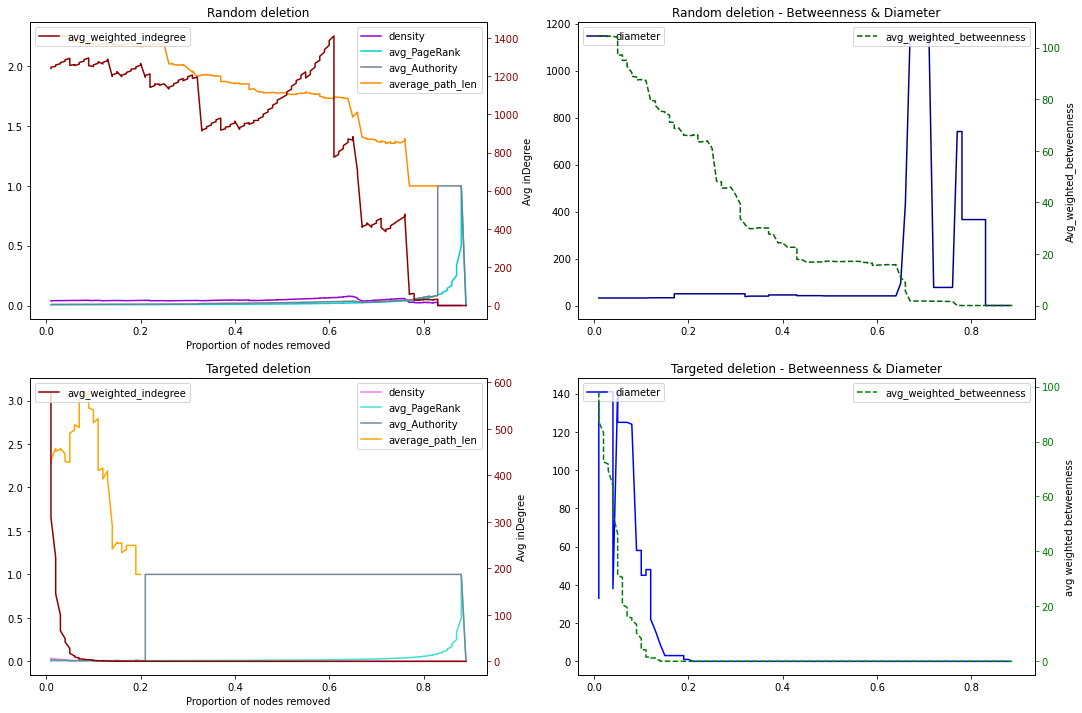

In [38]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
#remove assortativity degree, replace with pagerank
ax[0,0].plot('prop_removed','avg_PageRank',data=df_type1_weighted,ls='-',color='darkturquoise')
#add in authority score
ax[0,0].plot('prop_removed','avg_Authority',data=df_type1_weighted,ls='-',color='slategray')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[1,0].plot('prop_removed','avg_PageRank',data=df_type2_weighted,ls='-',color='turquoise')
# add in Authority
ax[1,0].plot('prop_removed','avg_Authority',data=df_type2_weighted,ls='-',color='lightslategray')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

### Attack on Edges

In [39]:
#because the g.es only shows the edge ID, we need to get the vertex source and target
##sv = source vertex 
##st = source target 
sv = []
st = []
for edge in g.es:
    source_vertex_id = edge.source
    target_vertex_id = edge.target
    source_vertex = g.vs[source_vertex_id]
    sv.append(source_vertex)
    target_vertex = g.vs[target_vertex_id]
    st.append(target_vertex)




In [40]:
##get name of source vertices. sv and st each is an igraph object so need to slice them to get the names

sv_name = []
for i in range(len(sv)):
    name = sv[i]['name']
    sv_name.append(name)
    
st_name = []
for i in range(len(st)):
    target_name = st[i]['name']
    st_name.append(target_name)
    

In [41]:
## new df with edges
edge_df = pd.DataFrame({'Edge_indice':g.es.indices,
                         'Edges_weight':g.es['weight'],
                         'Vertex_source':sv_name,
                         'Vertex_target':st_name})

In [42]:
##sort by descending weight
edge_df = edge_df.sort_values(by='Edges_weight',ascending=False)

In [43]:
edge_df.head(15)

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
489,489,27498,Hong Kong,British Virgin Islands
1035,1035,19730,Switzerland,British Virgin Islands
1046,1046,11590,Switzerland,Panama
608,608,10602,Jersey,British Virgin Islands
699,699,5584,Luxembourg,Panama
1134,1134,5485,United Kingdom,British Virgin Islands
835,835,4788,Panama,British Virgin Islands
464,464,4734,Guernsey,British Virgin Islands
970,970,4034,Singapore,British Virgin Islands
499,499,3749,Hong Kong,Seychelles


In [44]:
edge_deletelist = edge_df['Edge_indice'].tolist()

In [45]:
#Weighted on diameter
def Edges_weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.es)):
        try:
            g.delete_edges(edge_deletelist[i])
        except:
            continue
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/len(edge_deletelist),2) #2840 is ttotal rows in df
        prop_removed.append(prop)
        node_removed.append(edge_deletelist[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [46]:
jur= Edges_weighted_Type2_targeted_del(g)

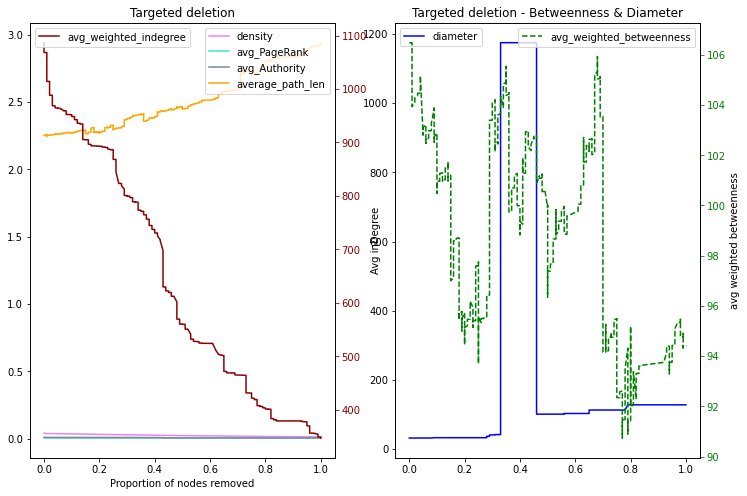

In [47]:
fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

#Targeted attack LHS Graphs

    
ax[0].plot('prop_removed','density',data=jur,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[0].plot('prop_removed','avg_PageRank',data=jur,ls='-',color='turquoise')
# add in Authority
ax[0].plot('prop_removed','avg_Authority',data=jur,ls='-',color='lightslategray')
ax[0].plot('prop_removed','average_path_len',data=jur,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=jur,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].plot('prop_removed','diameter',data=jur,ls='-',color='blue')
ax[1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1].legend(loc='upper left')
    
    
ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=jur,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()